# `reject` - Example usage

`reject` is a python package for _classification with rejection_. When the prediction's uncertainty is too high, the model abstains from predicting and the observation is passed on to a human expert who takes the final decision. It is useful for applications where making an error can be more costly than asking a human expert for help.


In [4]:
import reject
from reject.reject import ClassificationRejector
from reject.utils import generate_synthetic_output

In [5]:
print(reject.__version__)

0.1.0


## Generate synthetic NN output

In this example, we generate synthetic outputs of a NN with multiple samples of the predictive distribution. The output predictions are of shape `(n_observations, n_samples, n_classes)` and the true labels `(n_observations,)`. The data generation function uses 10 output classses

In [6]:
NUM_SAMPLES = 10
NUM_OBSERVATIONS = 1000

y_pred_all, y_true_all = generate_synthetic_output(NUM_SAMPLES, NUM_OBSERVATIONS)
print(y_pred_all.shape, y_true_all.shape)

(2000, 10, 10) (2000,)


## `ClassificationRejector`

### Object creation

The `ClassificationRejector` class rejects predictions from a classification model. It is initialized with the true labels and the predicted probabilities. The predicted probabilities have to have a shape `(n_observations, n_classes)` or `(n_observations, n_samples, n_classes)` for models with multiple samples of the predictive distribution such as MC Dropout or Deep Ensembles. The true labels have to have a shape `(n_observations,)`.


In [7]:
rej = ClassificationRejector(y_true_all, y_pred_all)

### `uncertainty` method

The uncertainty/confidence in a prediction can be quantified in 2 ways:
- Total uncertainty, which is entropy-based.\
=> can be decomposed in aleatoric (i.e. data) and epistemic (i.e. model) uncertainty
- Confidence, which directly uses the predicted probabilities.\
=> cannot be decomposed

Passing "TU" (total uncertainty), "AU" (aleatoric uncertainty), "EU" (epistemic uncertainty), or "confidence" as `unc_type` returns their corresponding Numpy array.

In [8]:
rej.uncertainty(unc_type="TU")

array([2.60818501, 2.84007655, 2.30384823, ..., 2.02701627, 1.83610227,
       1.99172594])

Passing `None` as `unc_type` returns a dict with all 3 uncertainties.

In [9]:
rej.uncertainty(unc_type=None)

{'TU': array([2.60818501, 2.84007655, 2.30384823, ..., 2.02701627, 1.83610227,
        1.99172594]),
 'AU': array([1.21435618, 0.94482062, 0.58954356, ..., 1.42100374, 1.28819001,
        1.29585897]),
 'EU': array([1.39382883, 1.89525593, 1.71430467, ..., 0.60601253, 0.54791226,
        0.69586697])}

### `plot_uncertainty` method

The uncertainty can be visualized using the `plot_uncertainty` method. It takes the `unc_type` as an argument. If `unc_type` is `None`, it plots all 3 uncertainties.

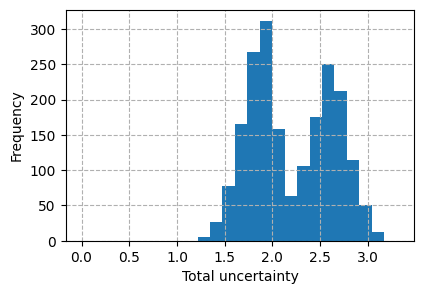

In [10]:
fig = rej.plot_uncertainty(unc_type="TU")

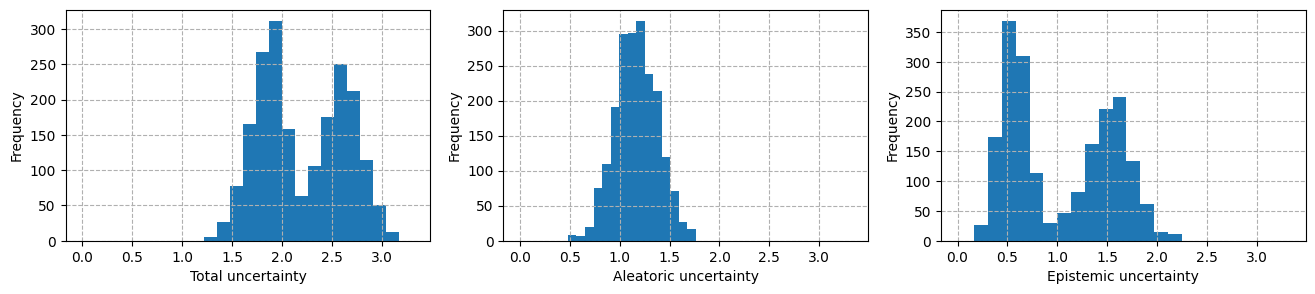

In [11]:
fig = rej.plot_uncertainty(unc_type=None)

### `reject` method

`reject` is the core function of the package. It takes as arguments a rejection threshold, the uncertainty type to use, and whether the threshold is relative or absolute. The rejection treshold is either relative (i.e. reject `threshold` percent) or absolute (i.e. reject if uncertainty is >= `threshold`). It returns 3 evaluation metrics and a boolean array of the same length as the input data, where `True` means the observation is rejected. The 3 evaluation metrics are Non-rejected accuracy (NRA), Classification quality (CQ) and Rejection quality (RQ), which follows the work of [Condessa et al. (2017)](https://doi.org/10.1016/j.patcog.2016.10.011).

Again, `unc_type` is one of {'TU', 'AU', 'EU', 'confidence'}


In [12]:
# implement single rejection point
rej.reject(threshold=0.5, unc_type="TU", relative=True, show=True)

             Non-rejected    Rejected
---------  --------------  ----------
Correct               891          20
Incorrect             109         980

  Non-rejected accuracy    Classification quality    Rejection quality
-----------------------  ------------------------  -------------------
                 0.8910                    0.9355              40.9908


((0.891, 0.9355, 40.990817263544535),
 array([ True,  True,  True, ..., False, False, False]))

### `plot_reject` method

It is interesting to plot the metrics for a varying threshold. `plot_reject` allows for visualization with different uncertainty types and metrics. At least one of `unc_type` or `metric` has to be passed as an argument. If `unc_type` is `None`, it plots all 3 uncertainties. If `metric` is `None`, it plots all 3 metrics. The threshold can be relative or absolute.

When a an appropriate threshold is selected, the `reject` method can be used to get the boolean array of rejected observations.

#### Specific `unc_type` and `metric`, relative rejection

Figure(450x300)


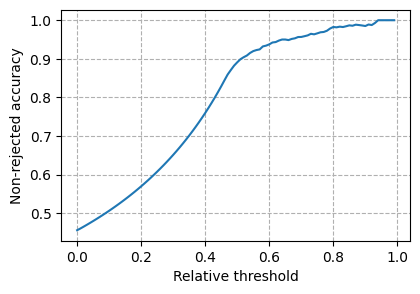

In [13]:
fig = rej.plot_reject(unc_type="TU", metric="NRA")
print(fig)

#### Specific `unc_type` and `metric`, absolute rejection

Figure(450x300)


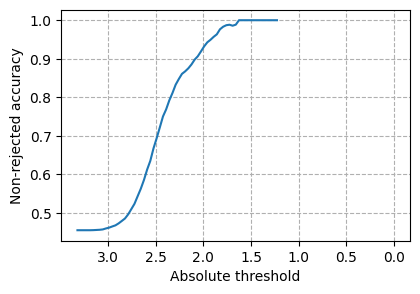

In [14]:
fig = rej.plot_reject(unc_type="TU", metric="NRA", relative=False)
print(fig)

#### Specific `unc_type` for all three `metric`s, absolute rejection

Figure(1600x300)


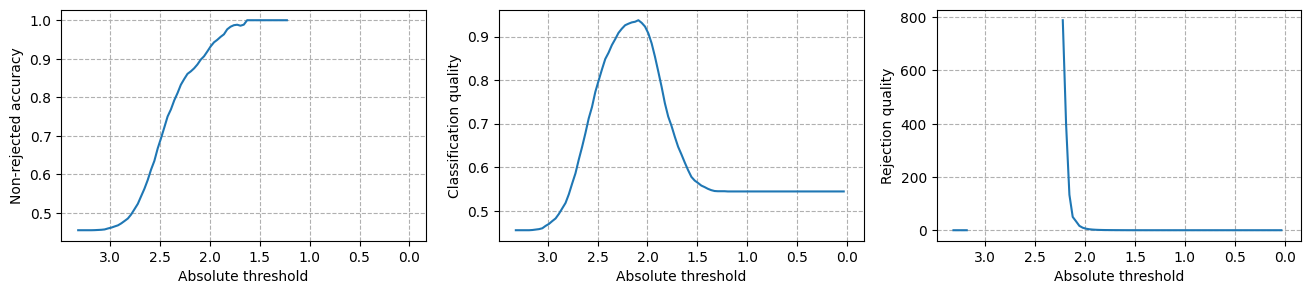

In [15]:
fig = rej.plot_reject(unc_type="TU", metric=None, relative=False)
print(fig)

#### Specific `metric` on all three `unc_type`s, absolute rejection

Figure(1600x300)


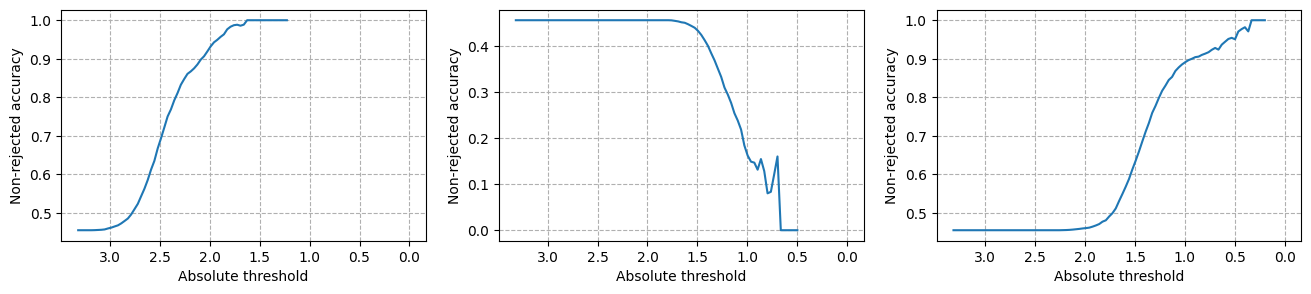

In [16]:
fig = rej.plot_reject(unc_type=None, metric="NRA", relative=False)
print(fig)